In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_dir = "/content/drive/MyDrive/DS Portfolio/Data Science Salary"
os.chdir(file_dir)

In [ ]:
!ls

ds_salaries.csv


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)
sns.set(rc={"figure.figsize": (25, 20)})
sns.set_style("whitegrid")

<ipython-input-4-23cc8418d341>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "ds_salaries.csv"
df = pd.read_csv(csv_filename)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Data Frame's info

In [ ]:
df.shape

(3755, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Describe Data Frame

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# Data Cleaning

## Check Missing value

In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

no missing value

# EDA

## How is the experience level distributed?

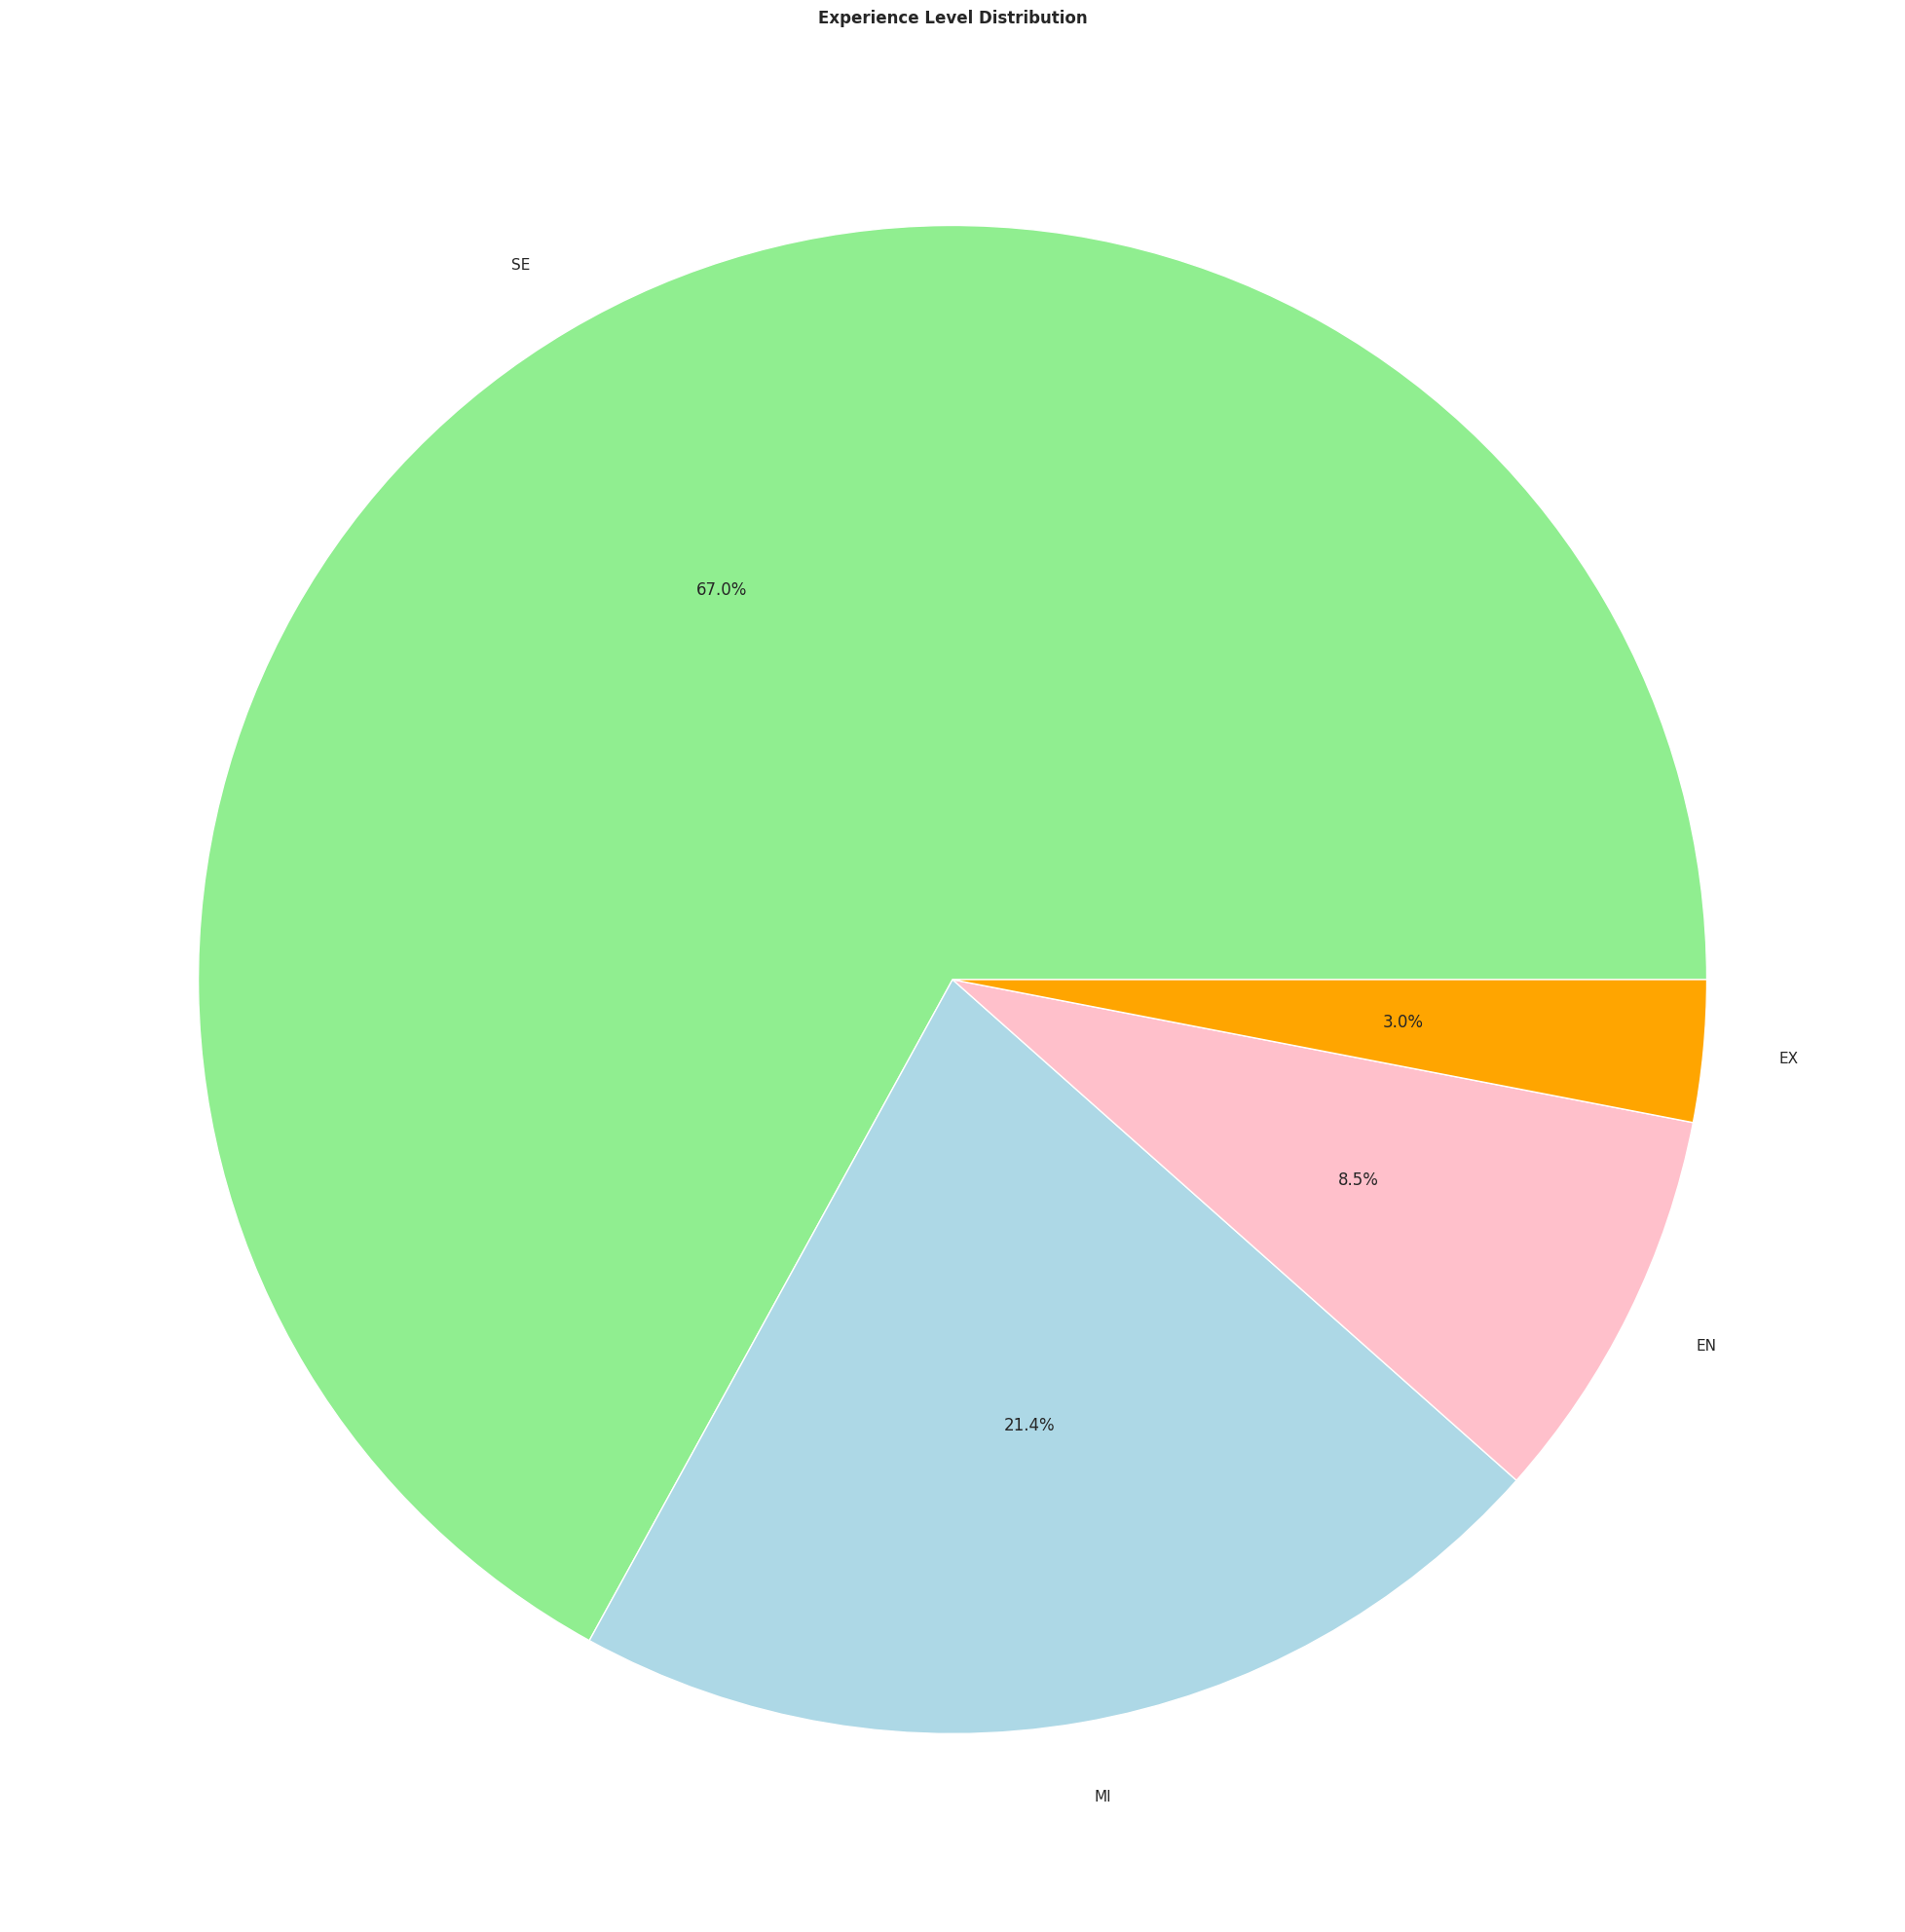

In [ ]:
level_counts = df['experience_level'].value_counts()
colors=["lightgreen","lightblue","pink","orange"]
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Experience Level Distribution')
plt.show()

* SE = Senior Level   
* MI = Mid-Level
* EN = Entry Level
* EX = Executive-Level

The most experience level is senior-level.





In [ ]:
max_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].max().reset_index()
max_salary_by_experience

,experience_level,salary_in_usd
0,EN,300000
1,EX,416000
2,MI,450000
3,SE,423834


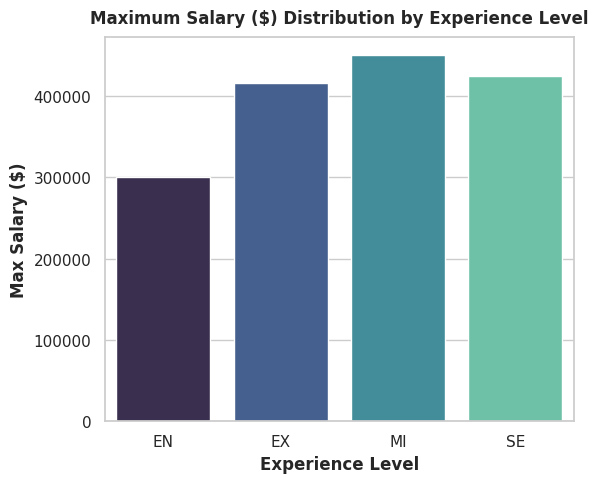

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='experience_level', y='salary_in_usd', data=max_salary_by_experience, palette='mako')

# Mengatur label dan judul
ax.set_xlabel('Experience Level')
ax.set_ylabel('Max Salary ($)')
ax.set_title('Maximum Salary ($) Distribution by Experience Level')

plt.xticks(rotation=0)

plt.show()

In [ ]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

## How is the company size distributed?

In [ ]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

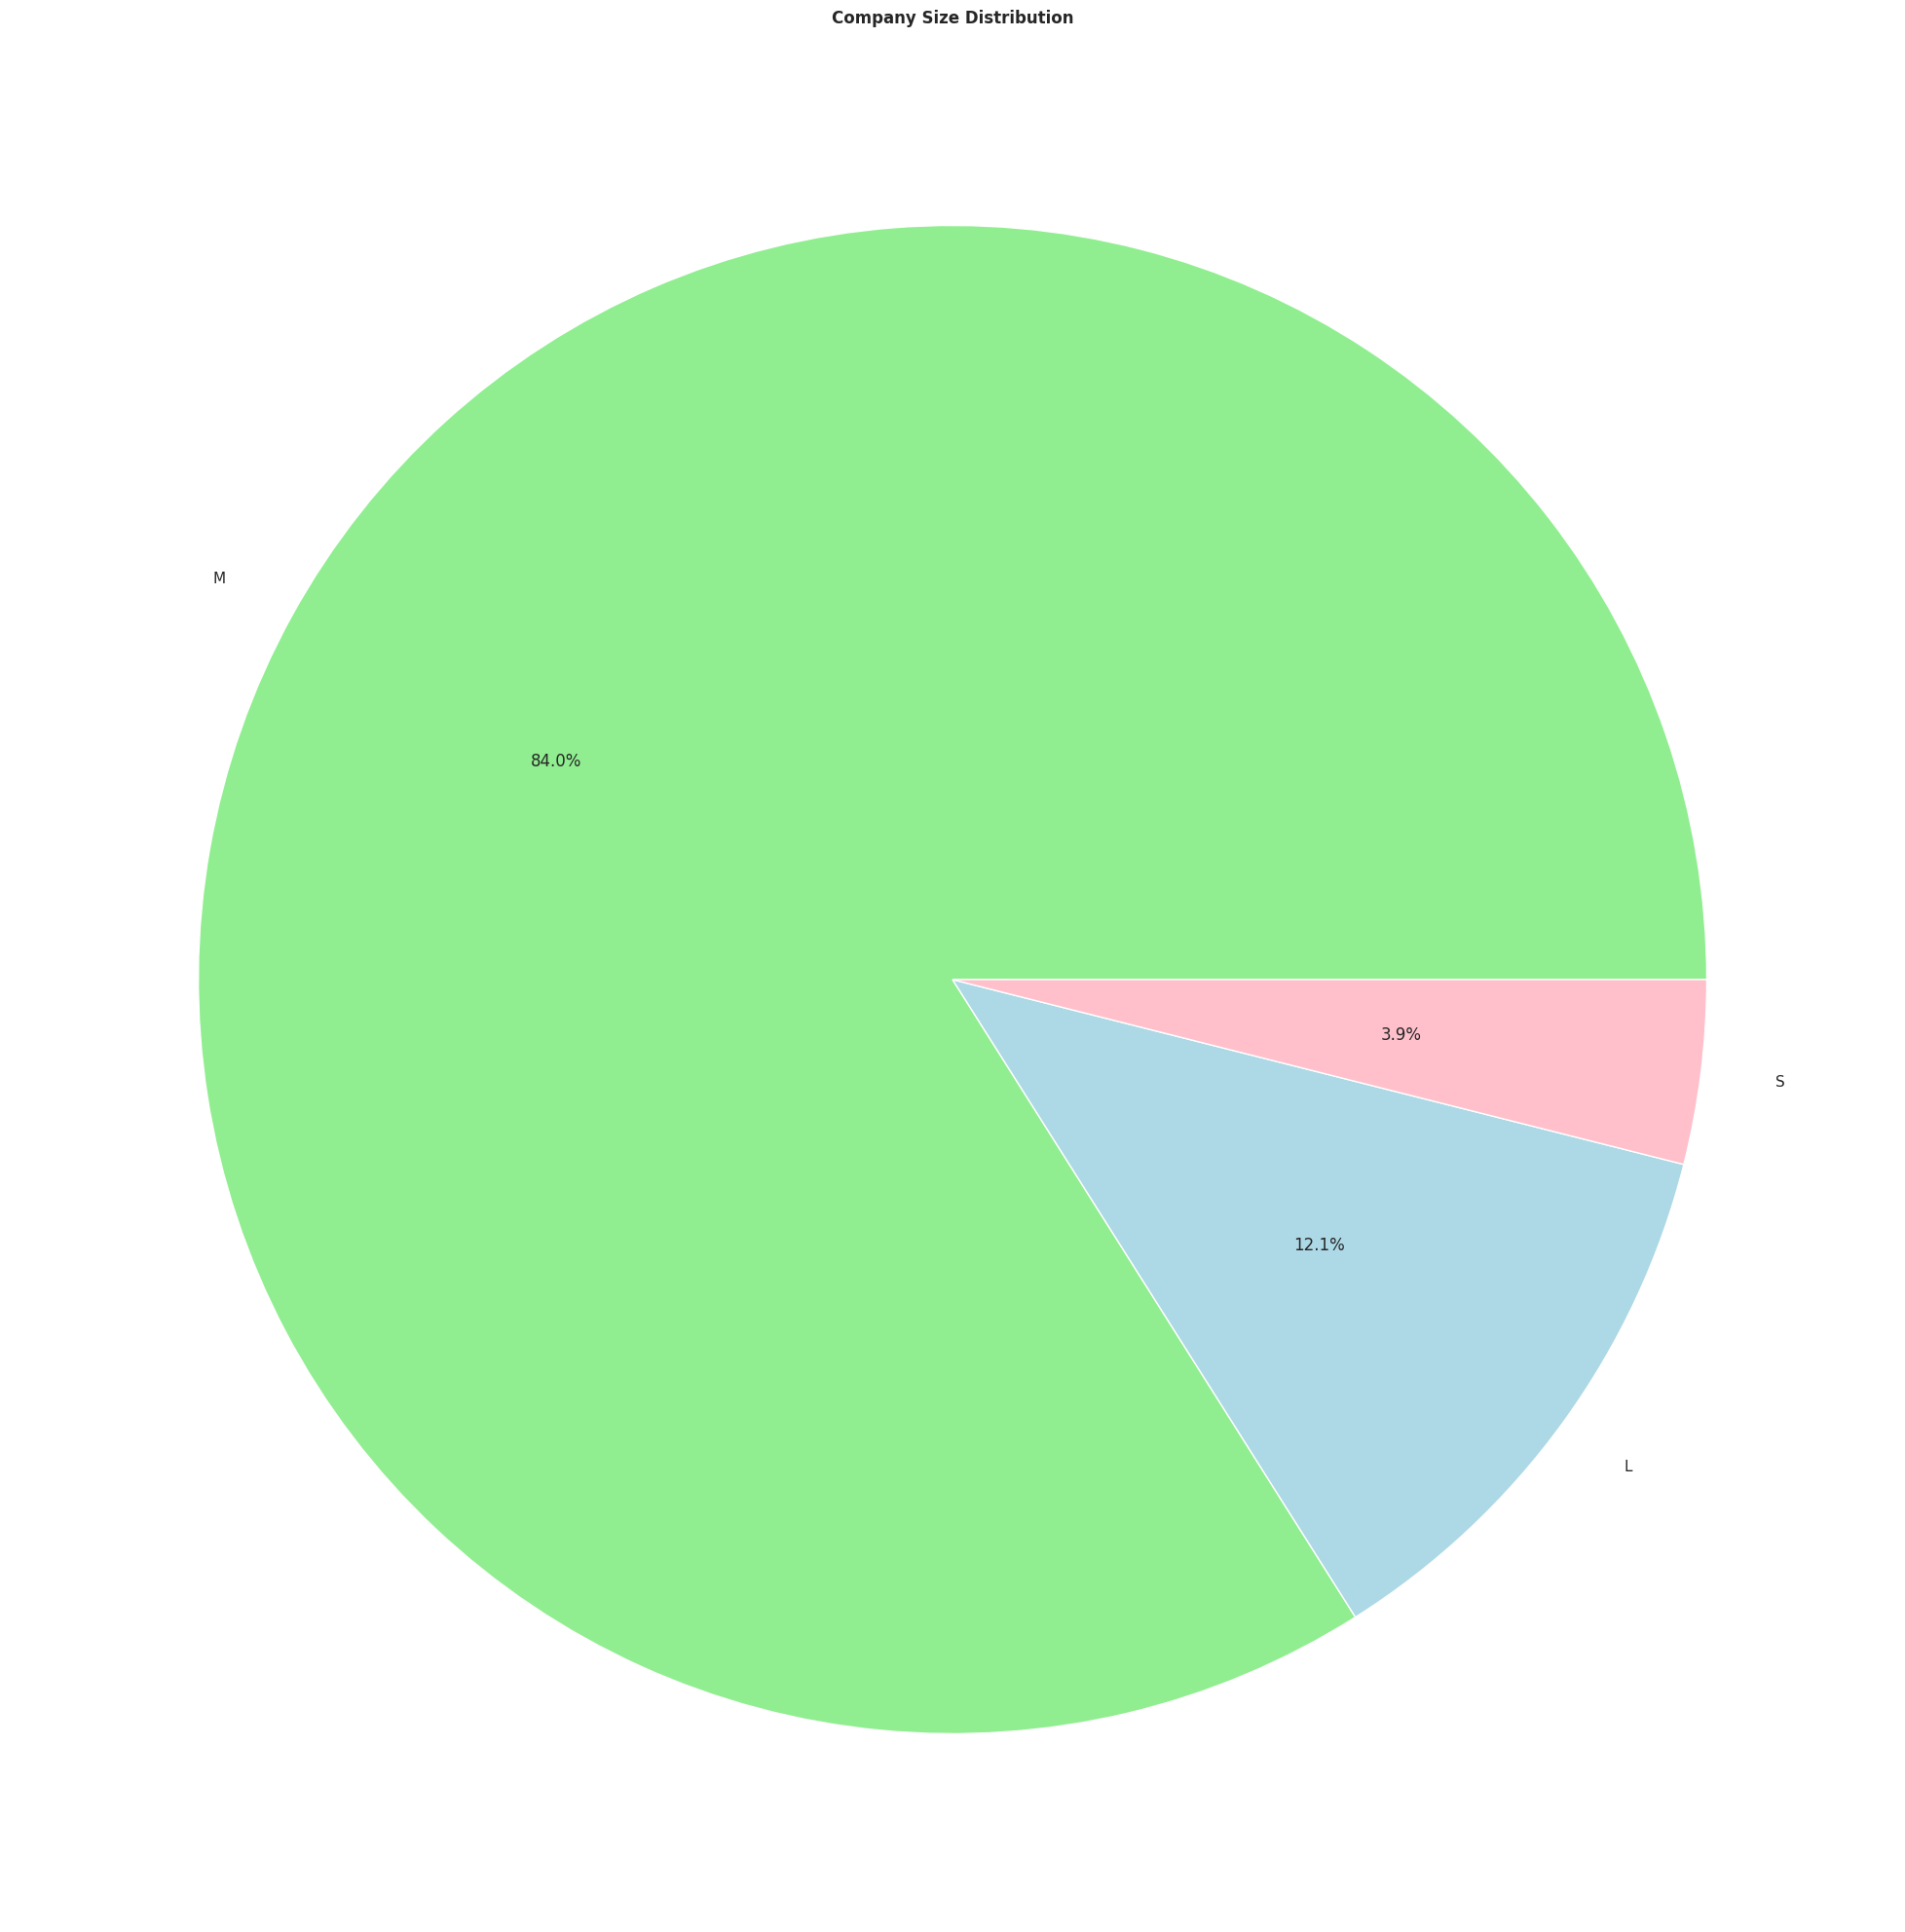

In [ ]:
level_counts = df['company_size'].value_counts()
colors=["lightgreen","lightblue","pink"]
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Company Size Distribution')
plt.show()

## How is the salary distributed by company size?

In [ ]:
max_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].max().reset_index()
max_salary_by_company_size

,company_size,salary_in_usd
0,L,423834
1,M,450000
2,S,416000


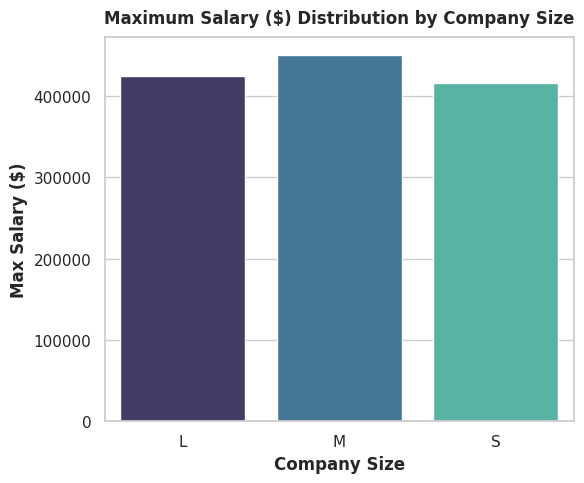

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='company_size', y='salary_in_usd', data=max_salary_by_company_size, palette='mako')

# Mengatur label dan judul
ax.set_xlabel('Company Size')
ax.set_ylabel('Max Salary ($)')
ax.set_title('Maximum Salary ($) Distribution by Company Size')

plt.xticks(rotation=0)

plt.show()

Companies with medium size can provide a higher salary than other companies size.

## Job Title distributions

In [ ]:
top_10_titles = df['job_title'].value_counts()[:10].index.tolist()

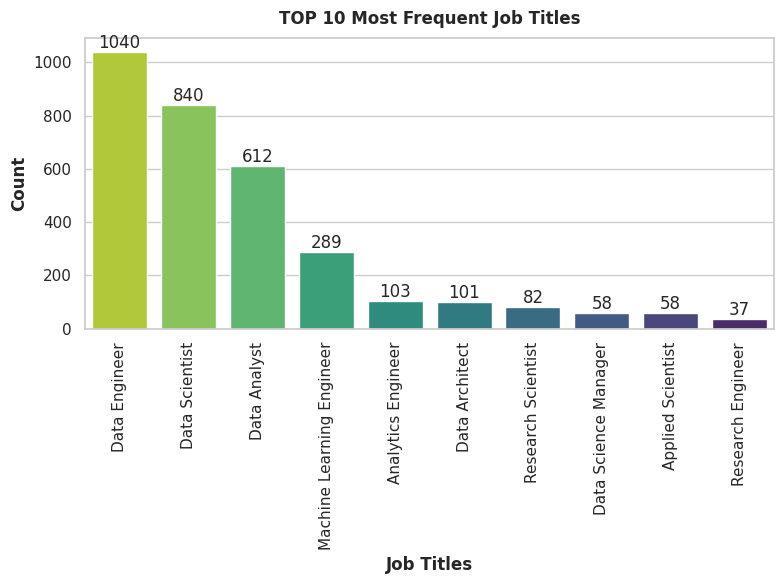

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='job_title', data=df[df['job_title'].isin(top_10_titles)], order = top_10_titles, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 10 Most Frequent Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The most frequent job title is Data Engineer

## Top 10 highest salary by job titles

In [ ]:
max_salary_by_job_titles = df.groupby('job_title')['salary_in_usd'].max()[:10].reset_index()
max_salary_by_job_titles

,job_title,salary_in_usd
0,3D Computer Vision Researcher,50000
1,AI Developer,300000
2,AI Programmer,70000
3,AI Scientist,423834
4,Analytics Engineer,289800
5,Applied Data Scientist,380000
6,Applied Machine Learning Engineer,130000
7,Applied Machine Learning Scientist,423000
8,Applied Scientist,350000
9,Autonomous Vehicle Technician,45555


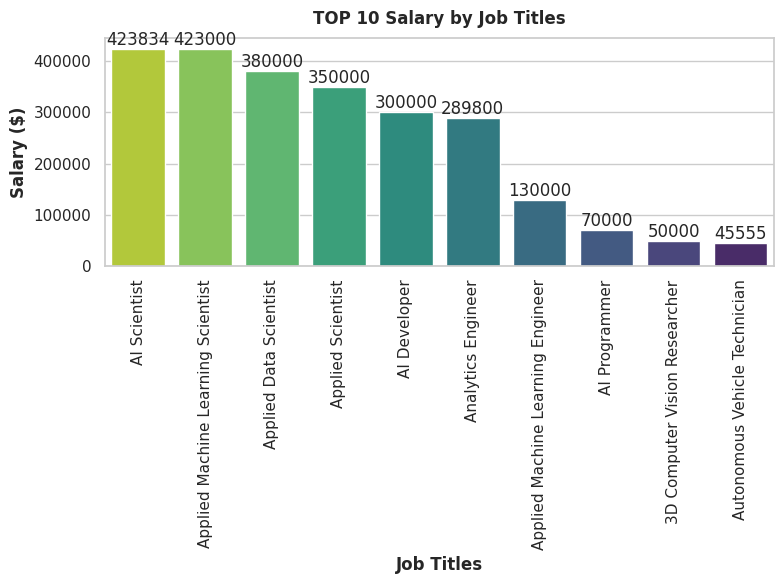

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='job_title', y='salary_in_usd', data=max_salary_by_job_titles, order=max_salary_by_job_titles.sort_values('salary_in_usd', ascending=False)['job_title'], palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 10 Salary by Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Salary ($)')
plt.xticks(rotation=90)
plt.show()

## Salary by country/company location

In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=bb91cd7ed9e59745991c0c32841901886d1f605496abfaf11d1f7353e77fdb46
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
# Import pycountry package
import pycountry

# define function to find country name
def do_search(country_code):
    try:
        result = pycountry.countries.get(alpha_2=country_code)
    except Exception:
        return np.nan
    else:
        return result.name

# Given ISO Alpha 2 column return country name
df["country"] = df["company_location"].apply(lambda country_code: do_search(country_code))
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada


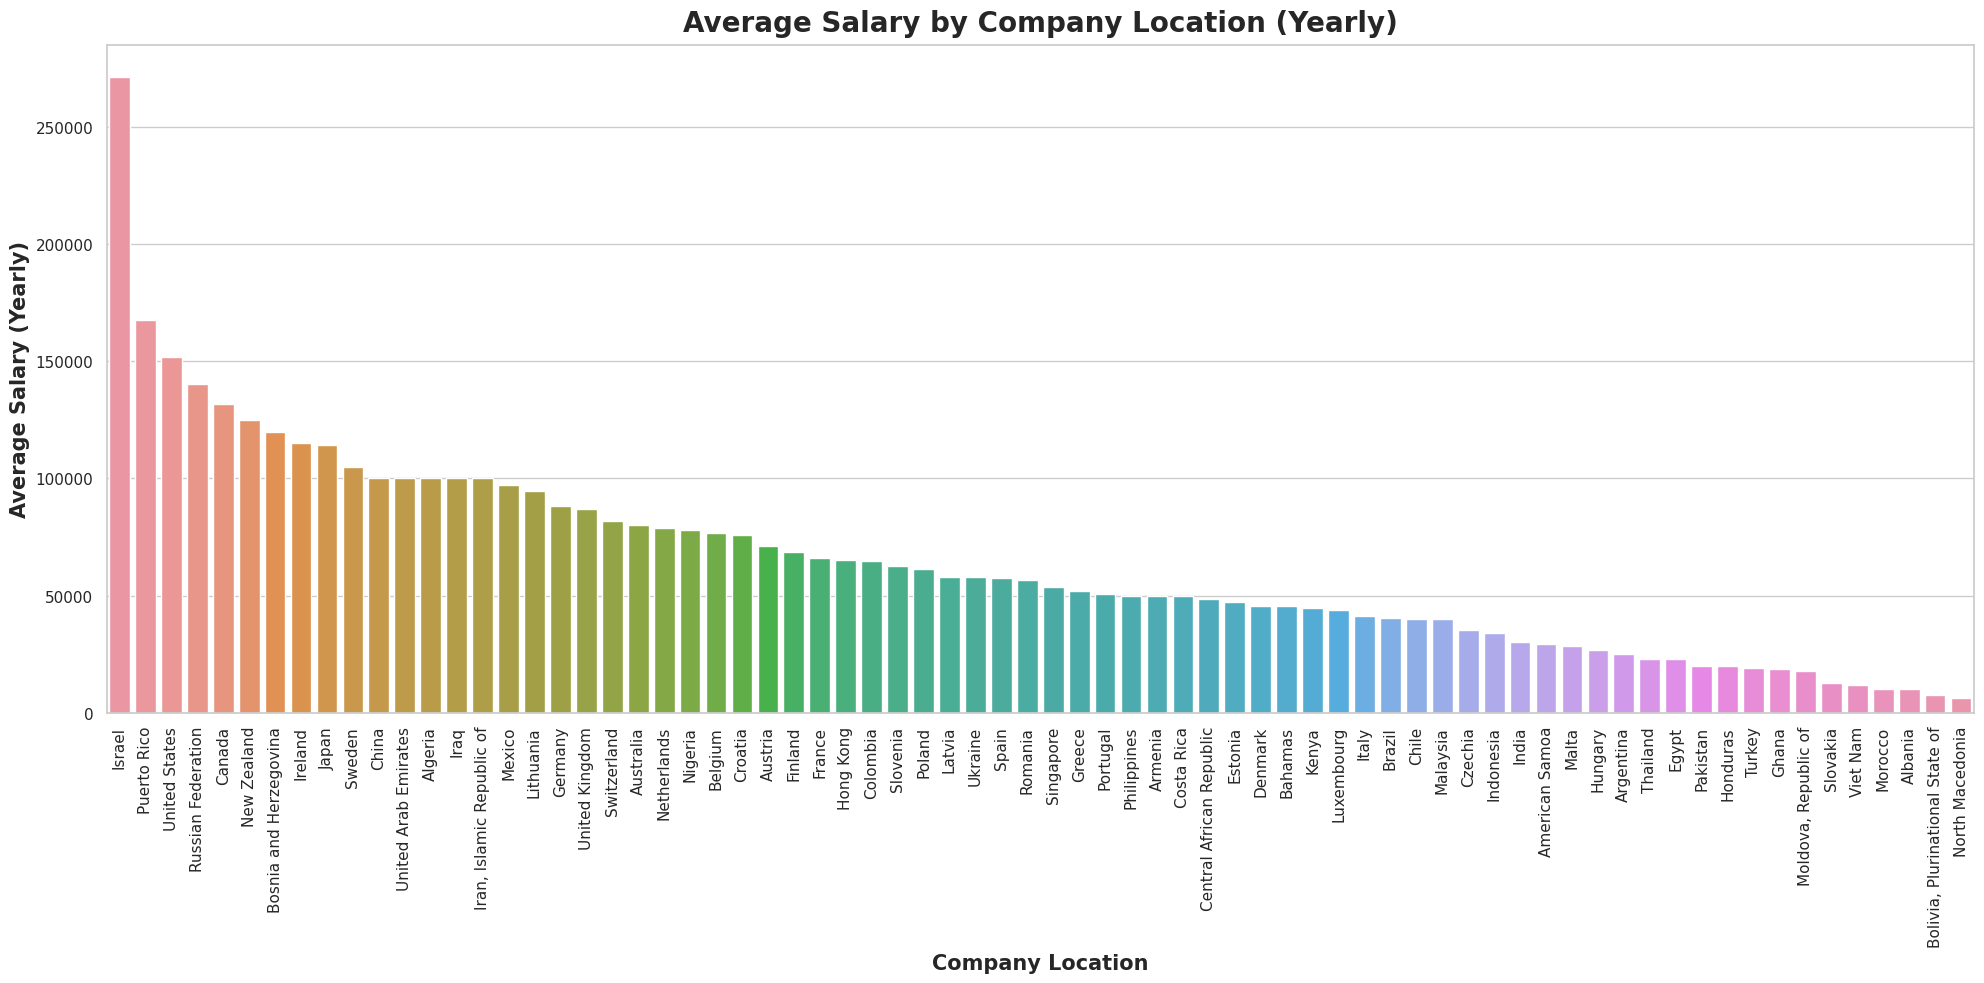

In [ ]:
avg_salary_by_location = df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location)
plt.title('Average Salary by Company Location (Yearly)',fontsize=20)
plt.xlabel('Company Location',fontsize=15)
plt.ylabel('Average Salary (Yearly)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The average salary by company location shows that data scientist working for companies located in Israel, United States and Russia have an average salary higher than companies located in other countries.

## Correlation Analysis

In [ ]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size']
numerical_columns = ['salary_in_usd']

In [ ]:
# create dummy variables, converting categorical columns to numerical for analysis

dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary'], axis=1)

<ipython-input-29-372361c910eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_df.corr()


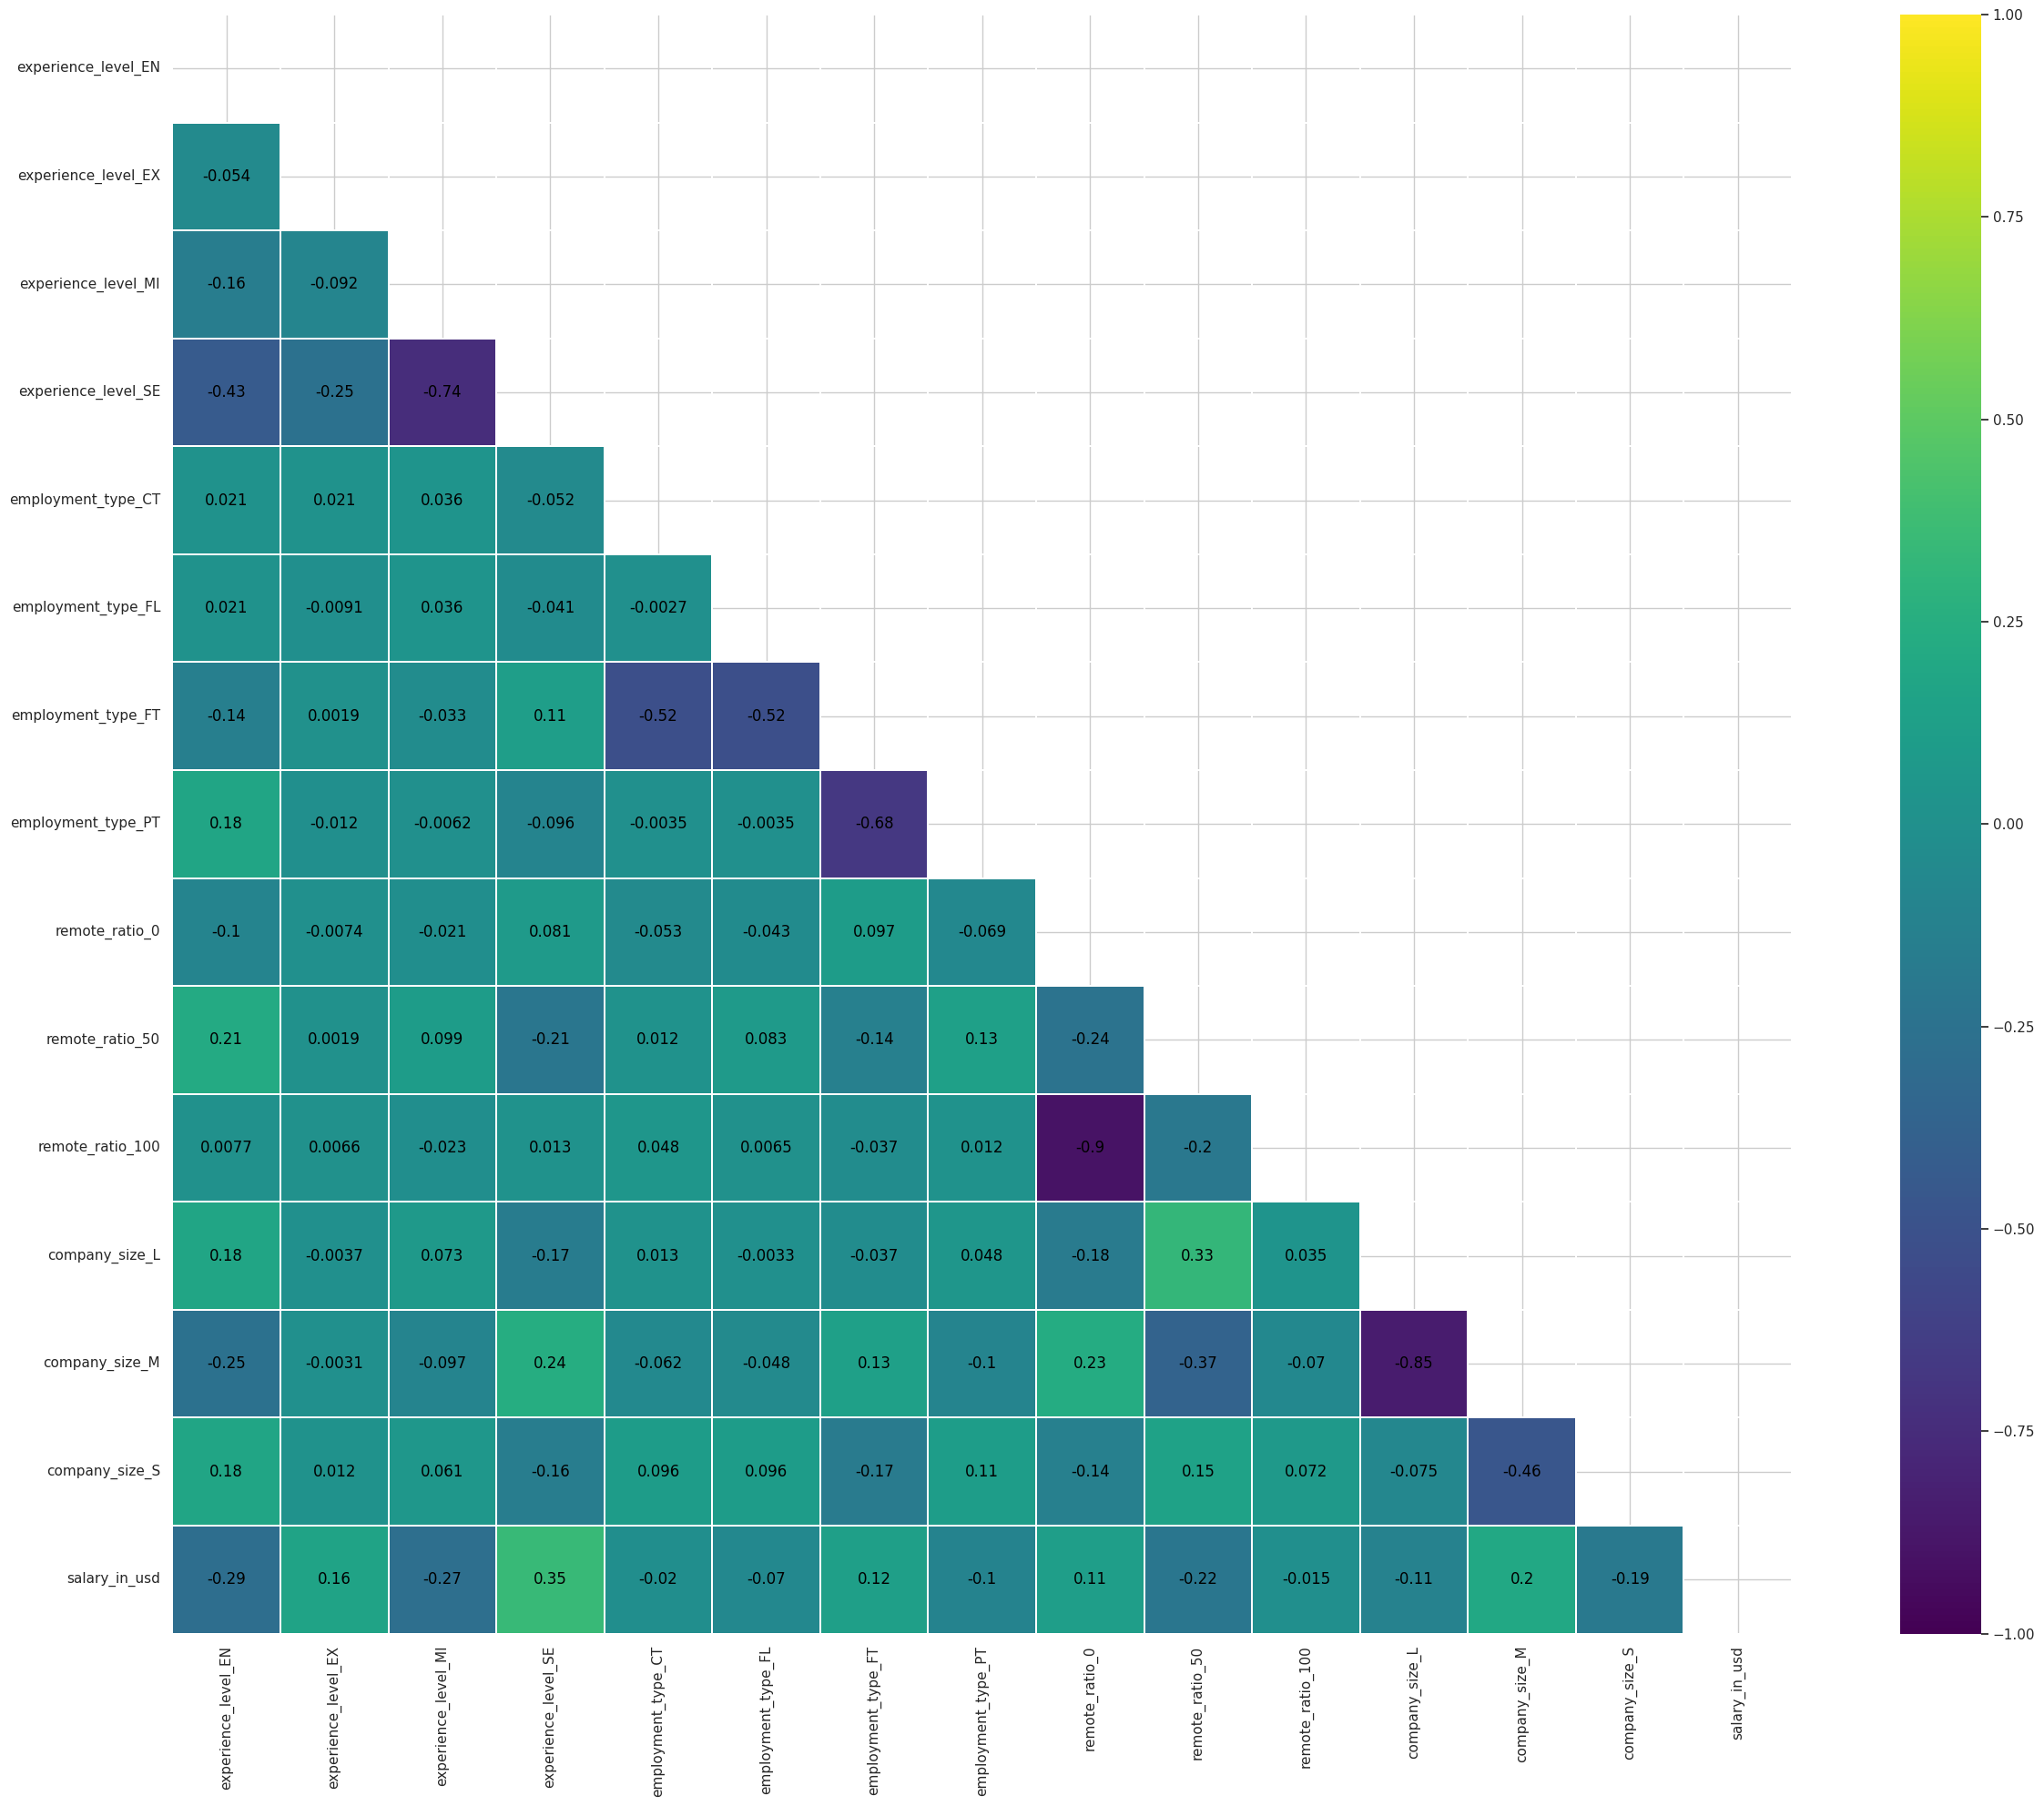

In [ ]:
correlation_matrix = processed_df.corr()

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(
    data = correlation_matrix,
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0,
    vmin = -1.0,
    linewidths = 0.1,
    annot_kws = {
        "size": 12,
        "color": "black"
    },
    square = True,
    cmap = cmap,
    annot = True
);

## Predictive Analysis

In [ ]:
df.drop("country", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = df.drop(["salary_in_usd"], axis=1)
y = df["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


### Modeling

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
dtr =  DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: DecisionTreeRegressor
R²: 0.950920348678536
RMSE: 13919.63177005226

- Regressor: Ridge
R²: 0.3045550312050934
RMSE: 52397.238275665775

- Regressor: Lasso
R²: 0.30456115396757244
RMSE: 52397.00762006753

- Regressor: ElasticNet
R²: 0.3045519643997884
RMSE: 52397.353807417654

- Regressor: RandomForestRegressor
R²: 0.9759090086368283
RMSE: 9752.239272557797

- Regressor: XGBRegressor
R²: 0.9578407604366269
RMSE: 12901.000636314722

- Regressor: LGBMRegressor
R²: 0.9863621703759146
RMSE: 7337.525820563511



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.9536979810933627


In [ ]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(seed=20,
                        colsample_bytree=lgbm_cv.best_params_["colsample_bytree"],
                        learning_rate=lgbm_cv.best_params_["learning_rate"],
                        max_depth=lgbm_cv.best_params_["max_depth"],
                        n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.9780945108715221
RMSE: 9299.369189453733


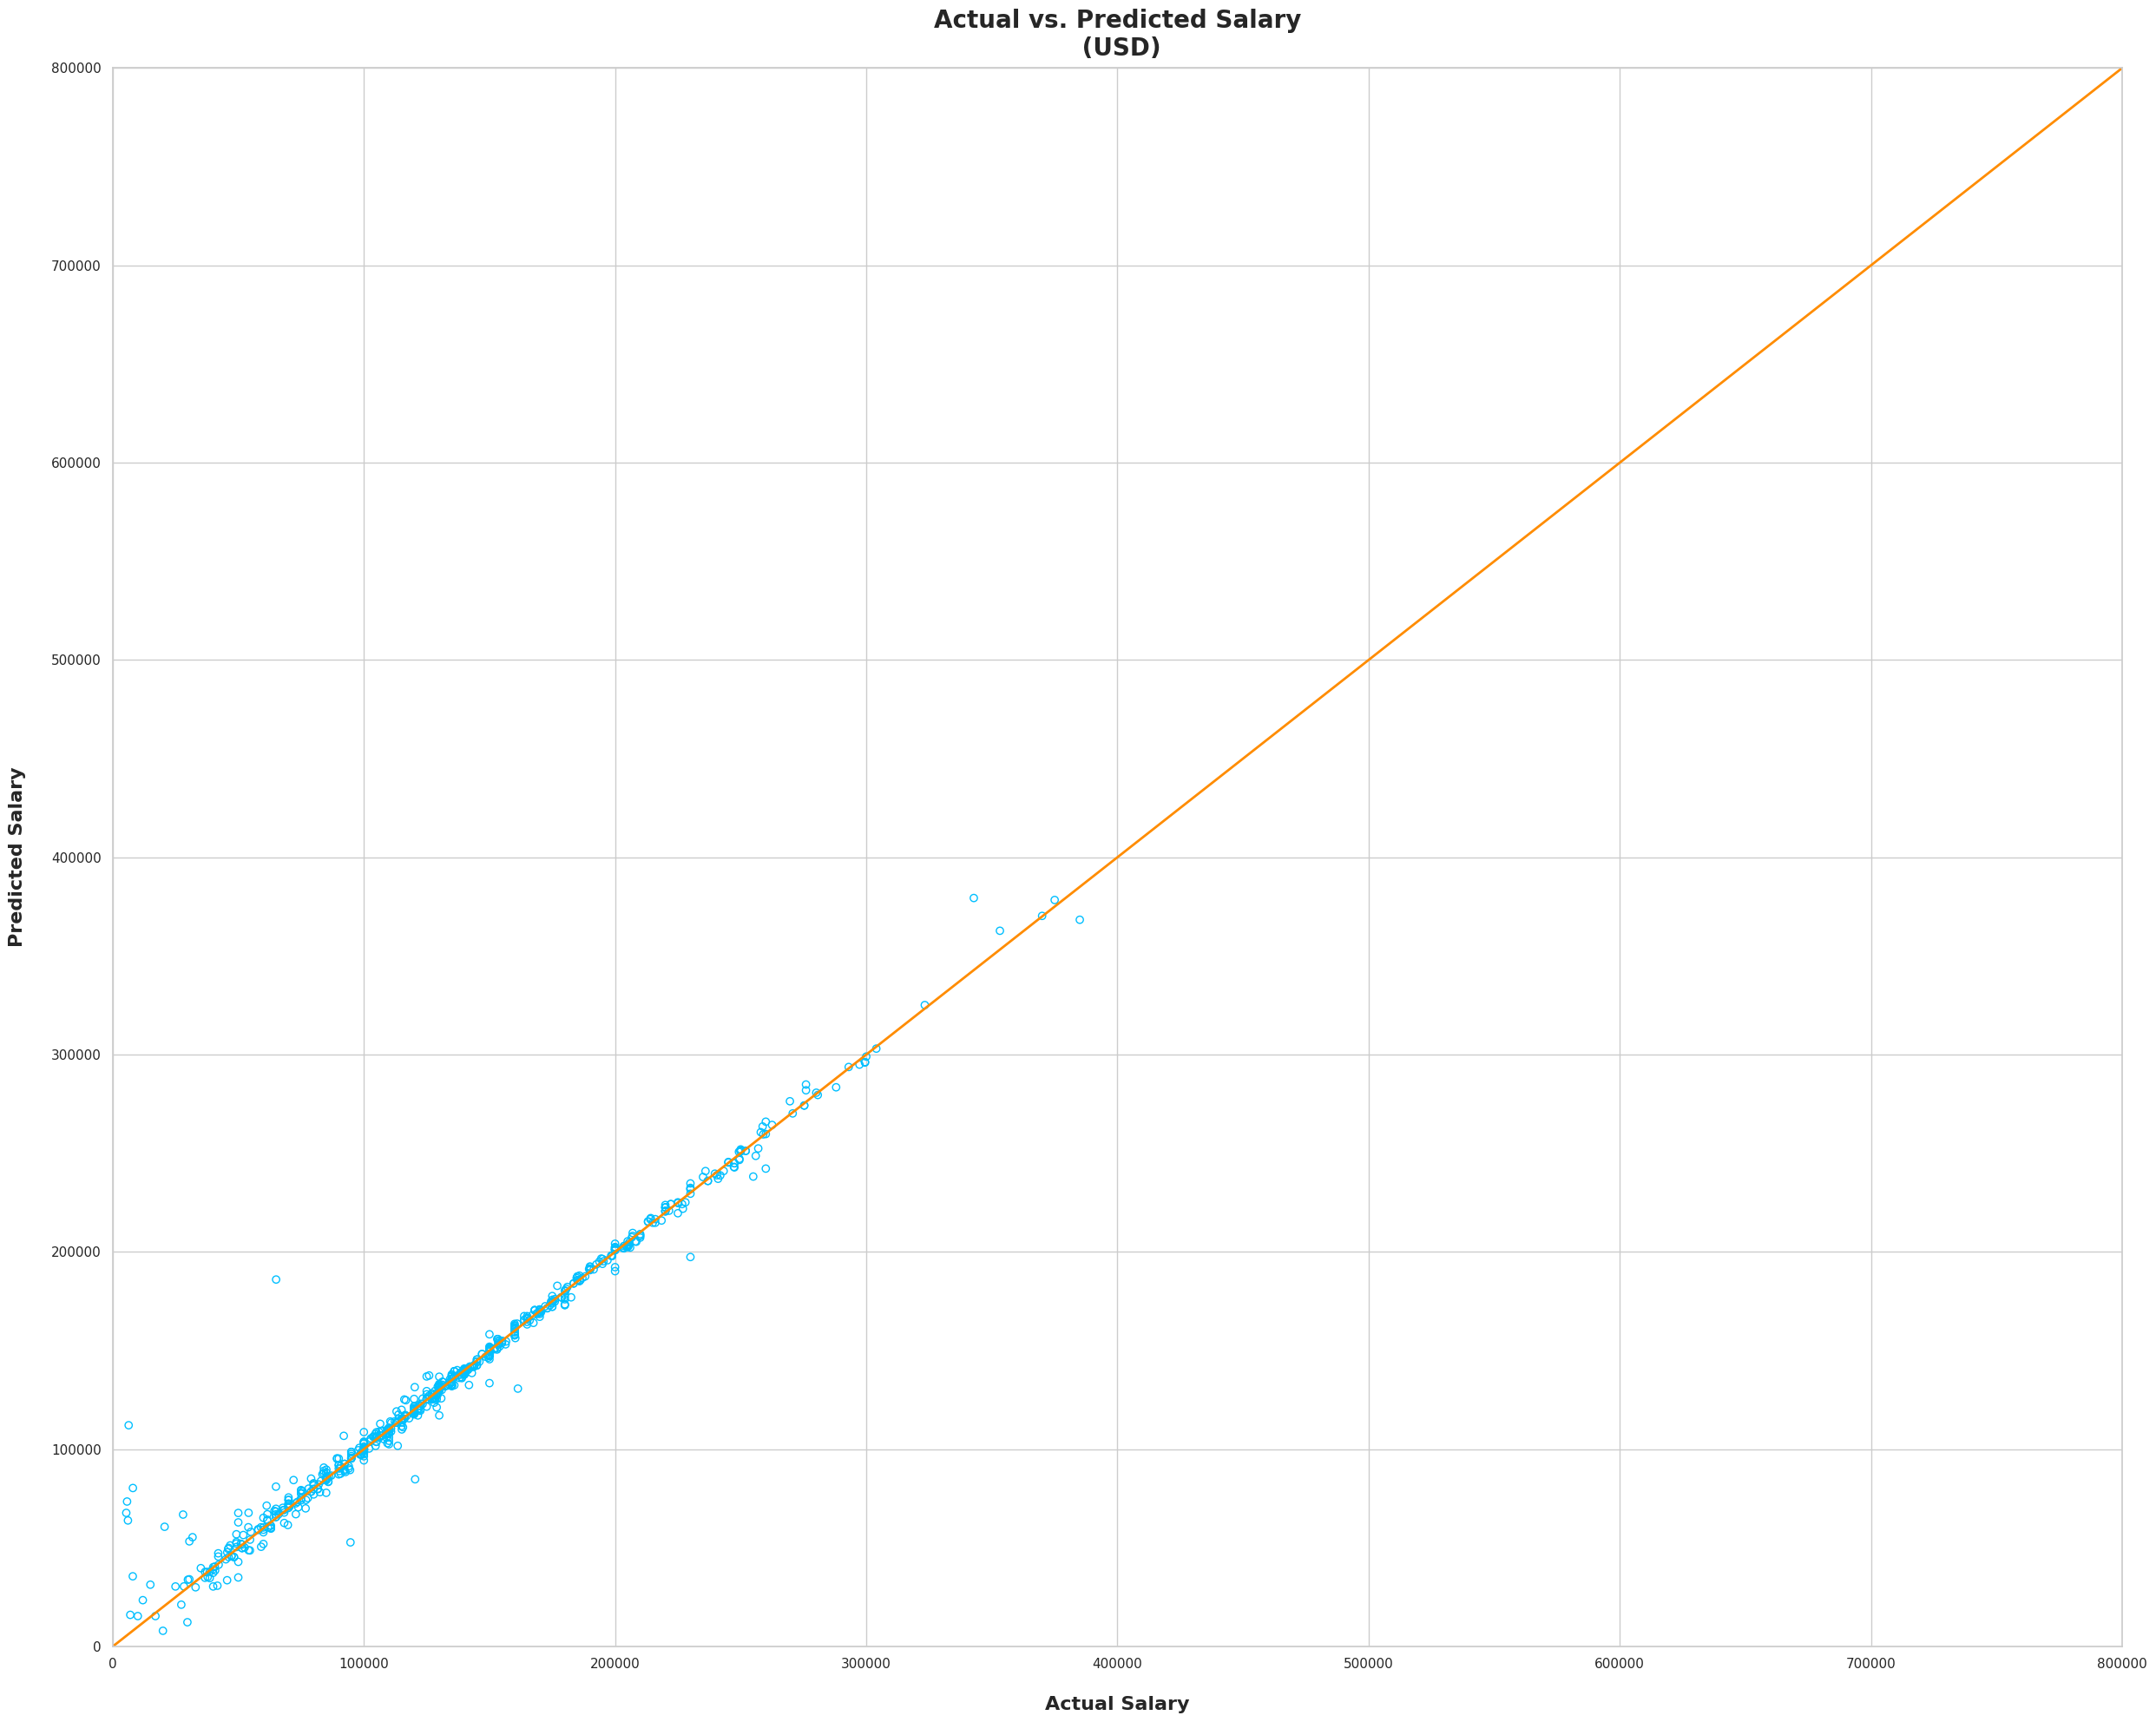

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = y_test
predicted_price = y_pred

plt.figure()
plt.title("Actual vs. Predicted Salary\n (USD)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Salary", fontsize=16)
plt.ylabel("Predicted Salary\n", fontsize=16)
plt.show()

In [ ]:
y_test_pred = lgbm_mod.predict(X_test)

##Comparing the actual output values with the predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df1

,Actual,Predicted
2148,168000,170284.709521
1044,179975,175981.671662
3321,144000,142614.481673
439,222200,224217.970520
3519,230000,197402.700133
...,...,...
2403,105000,103848.556258
2897,141525,140614.366264
612,58000,59077.005588
2677,36773,37802.297951
